In [1]:
from os.path import join, exists
import joblib
import matplotlib.pyplot as plt
import datetime

In [2]:
# Constants
base_dir = "/project/def-zqhong/RicochetData/MIT/"

psd_dict = {"MIT_Al_Summer2022": ["Background_workingpoint_August", 
                                  "Ba133_August",
                                  "Co60_August",
                                  "AmBe_August"],
            "MIT_Al_Fall2022": ["Fe55_23october",
                                "Fe55_24october", 
                                "Fe55_december"]
           }


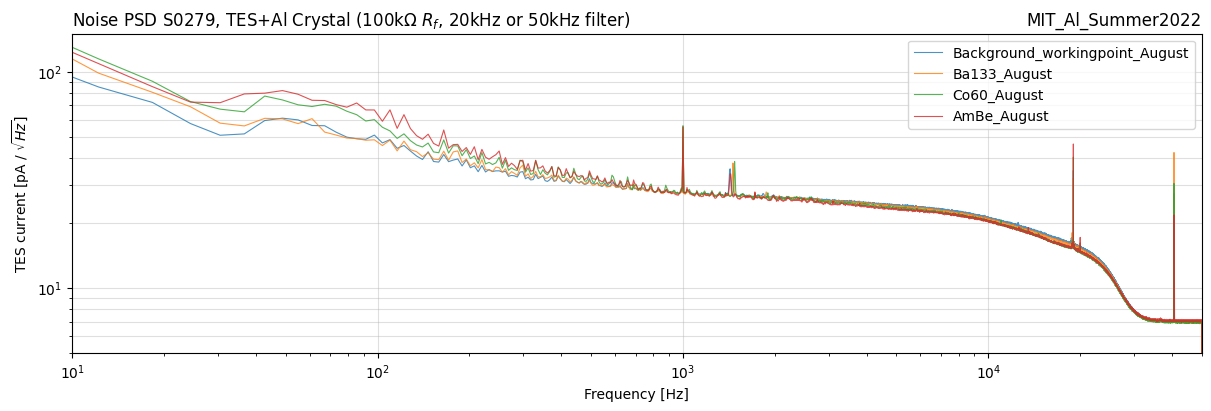

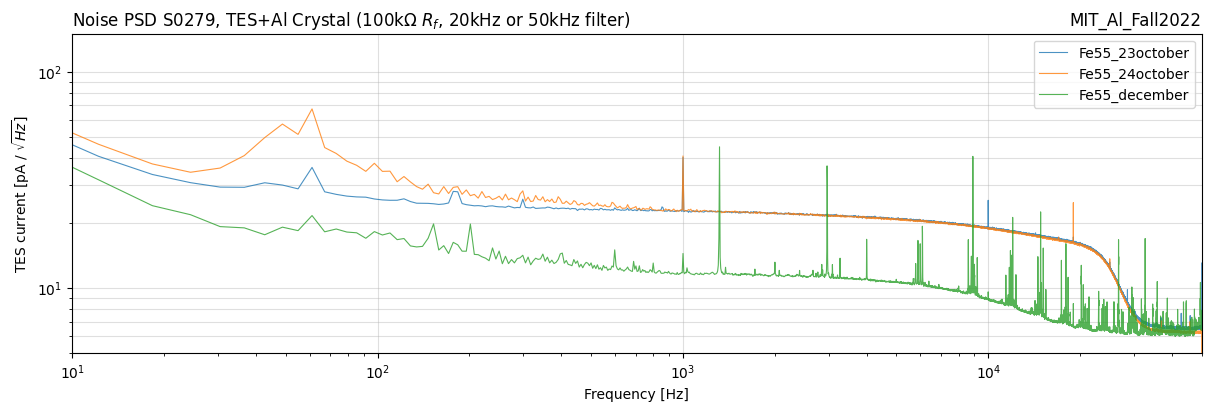

In [4]:
#Plot PSD data

plotlab = "PyCRP PSD from traces with 16k samples"

for run, series in psd_dict.items():
    fig_tc_log, ax_tc_log = plt.subplots(ncols=1, nrows=1, figsize=(12,4),
                       constrained_layout=True, sharex=False, sharey=False)
    for serie in series:
        path = join(base_dir,run,"processed","PSDs_"+serie+".joblib")
        if not exists(path):
            print("File not found", path)
        else:
            psd_file = joblib.load(path)
            plotlab = serie
            ax_tc_log.loglog(psd_file["f"],psd_file['PSDs']['CH1'],label=plotlab,alpha=0.8, lw=0.8) 
            
    y_range = (5,150)   
    ax_tc_log.set_ylim(y_range)
    x_range = (1e1,5e4)
    ax_tc_log.set_xlim(*x_range)  
    ax_tc_log.set_ylabel(r'TES current [pA / $\sqrt{Hz}$]')   
    ax_tc_log.grid(alpha=0.4, which='both', axis='y')
    ax_tc_log.grid(alpha=0.4, which='major', axis='x')
    ax_tc_log.legend(loc="upper right")
    ax_tc_log.set_xlabel('Frequency [Hz]')
    ax_tc_log.set_title(r'Noise PSD S0279, TES+Al Crystal (100k$\Omega$ $R_f$, 20kHz or 50kHz filter)', loc='left')  
    ax_tc_log.set_title(run, loc='right')

    today = str(datetime.date.today())
    fig_tc_log.savefig("./output/"+today+"-PSD_"+run+".pdf")